In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

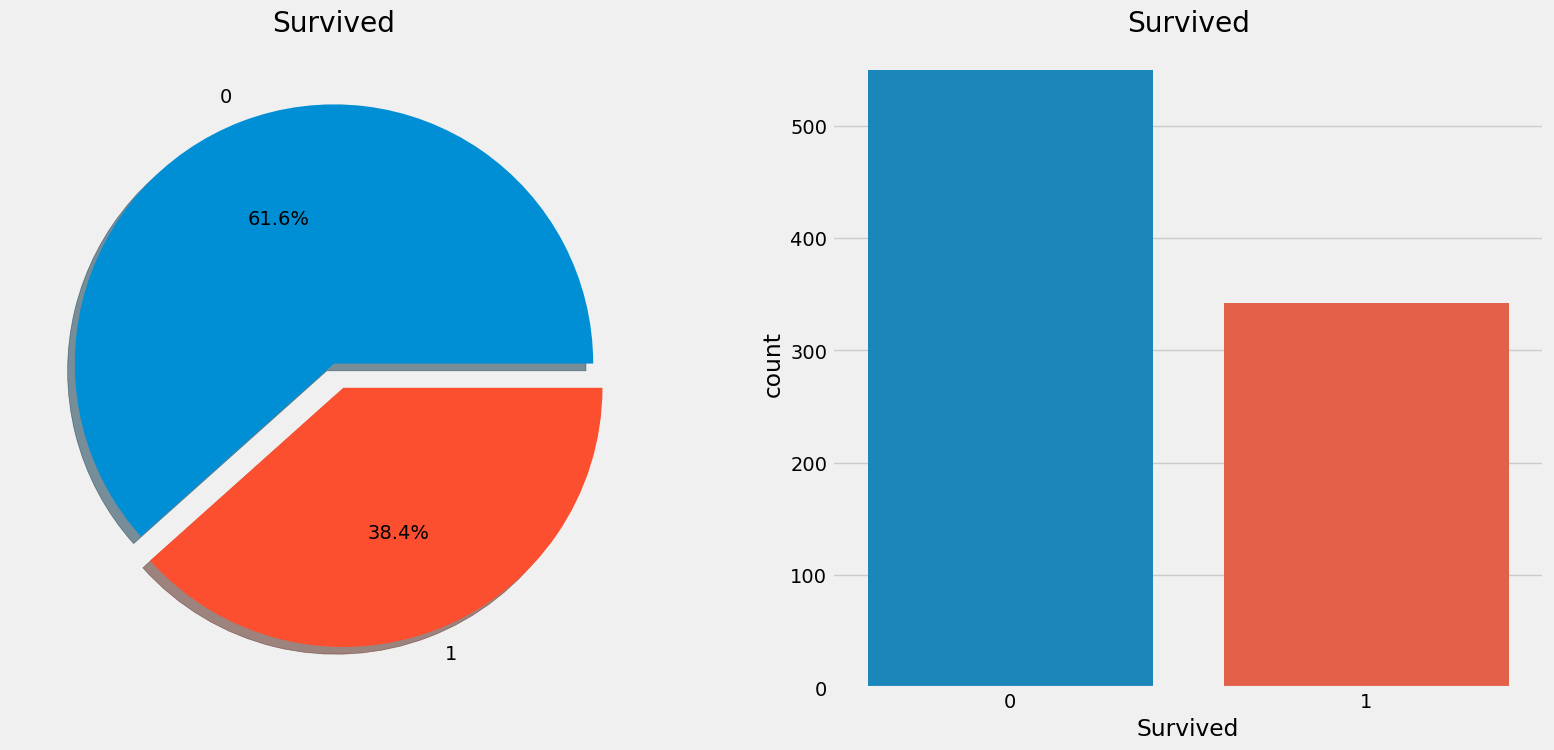

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

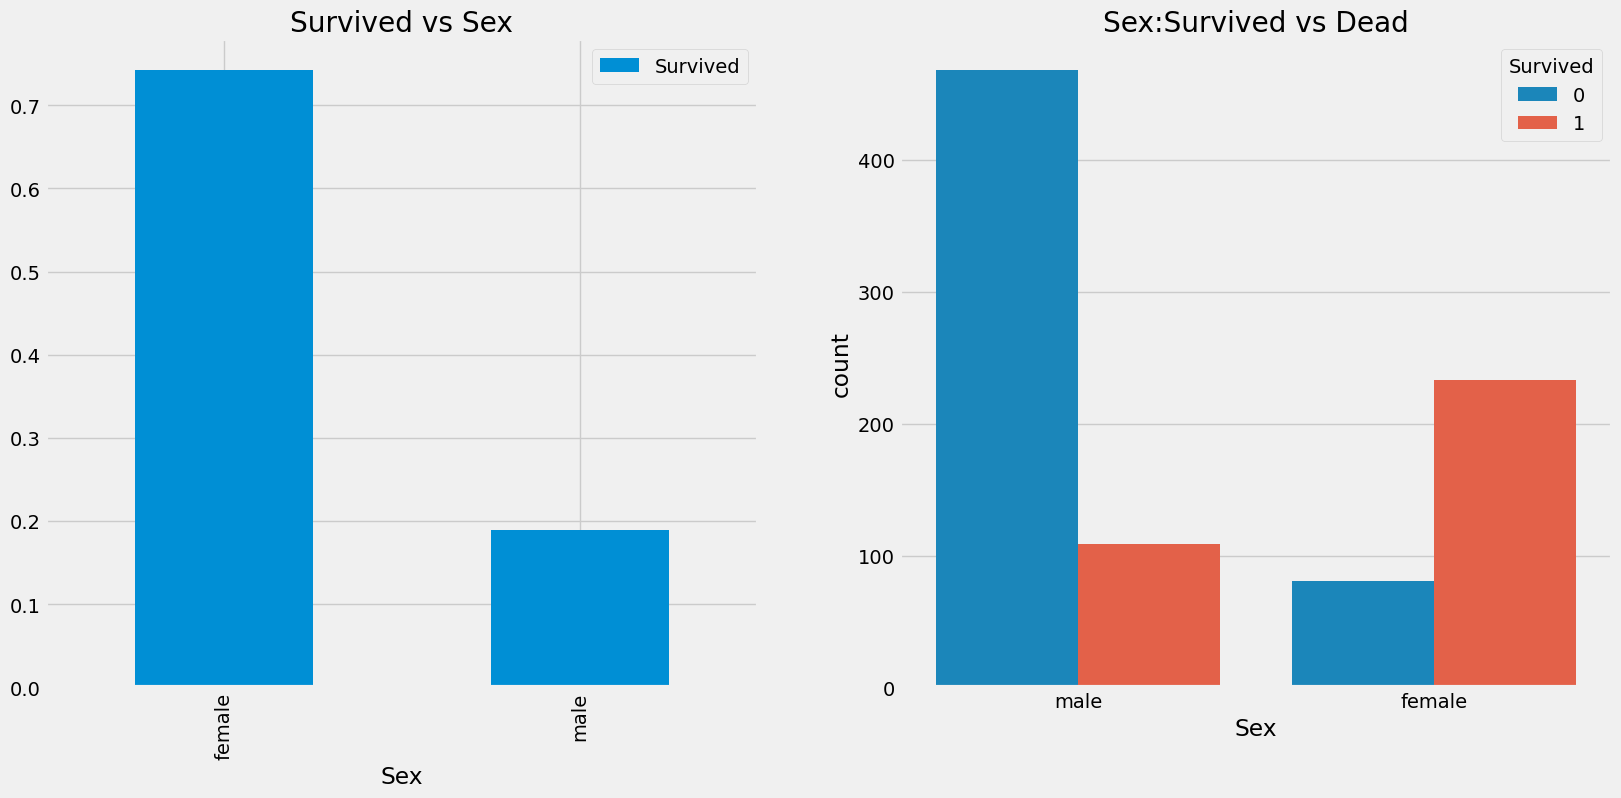

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x ='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


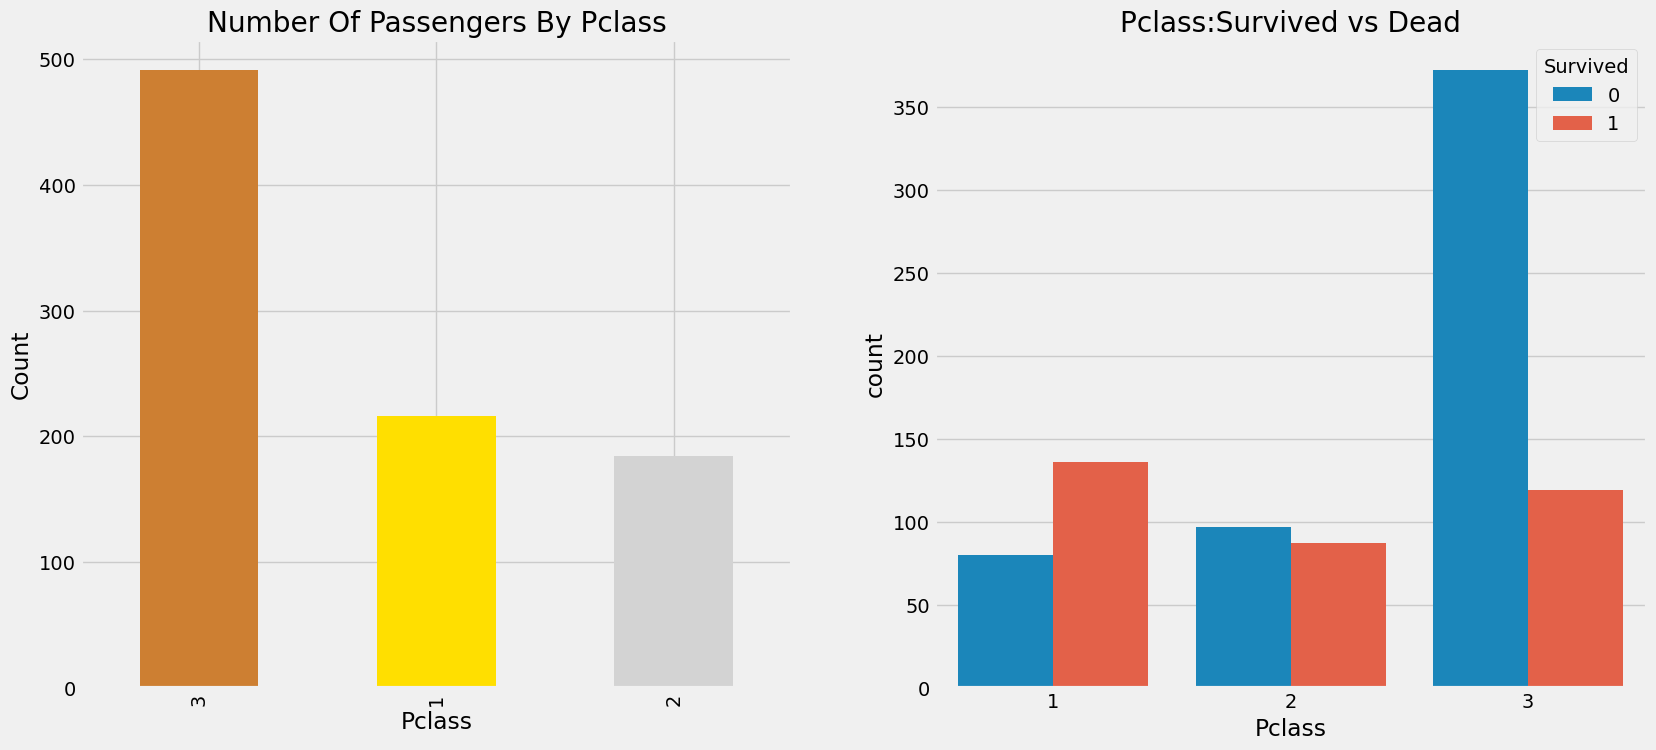

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

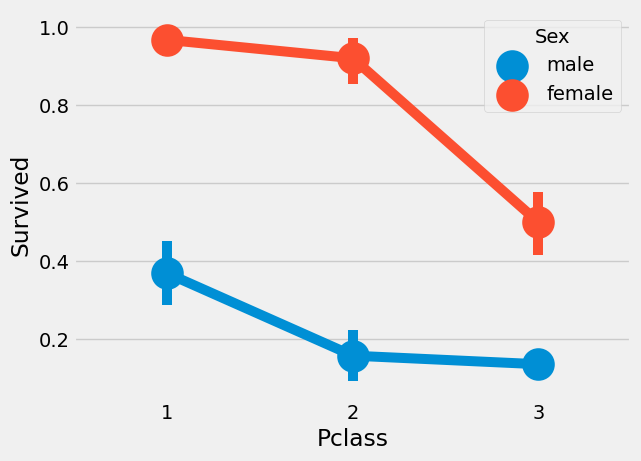

In [11]:
sns.pointplot(x='Pclass',y='Survived',hue= "Sex",data=data)
plt.show()

In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


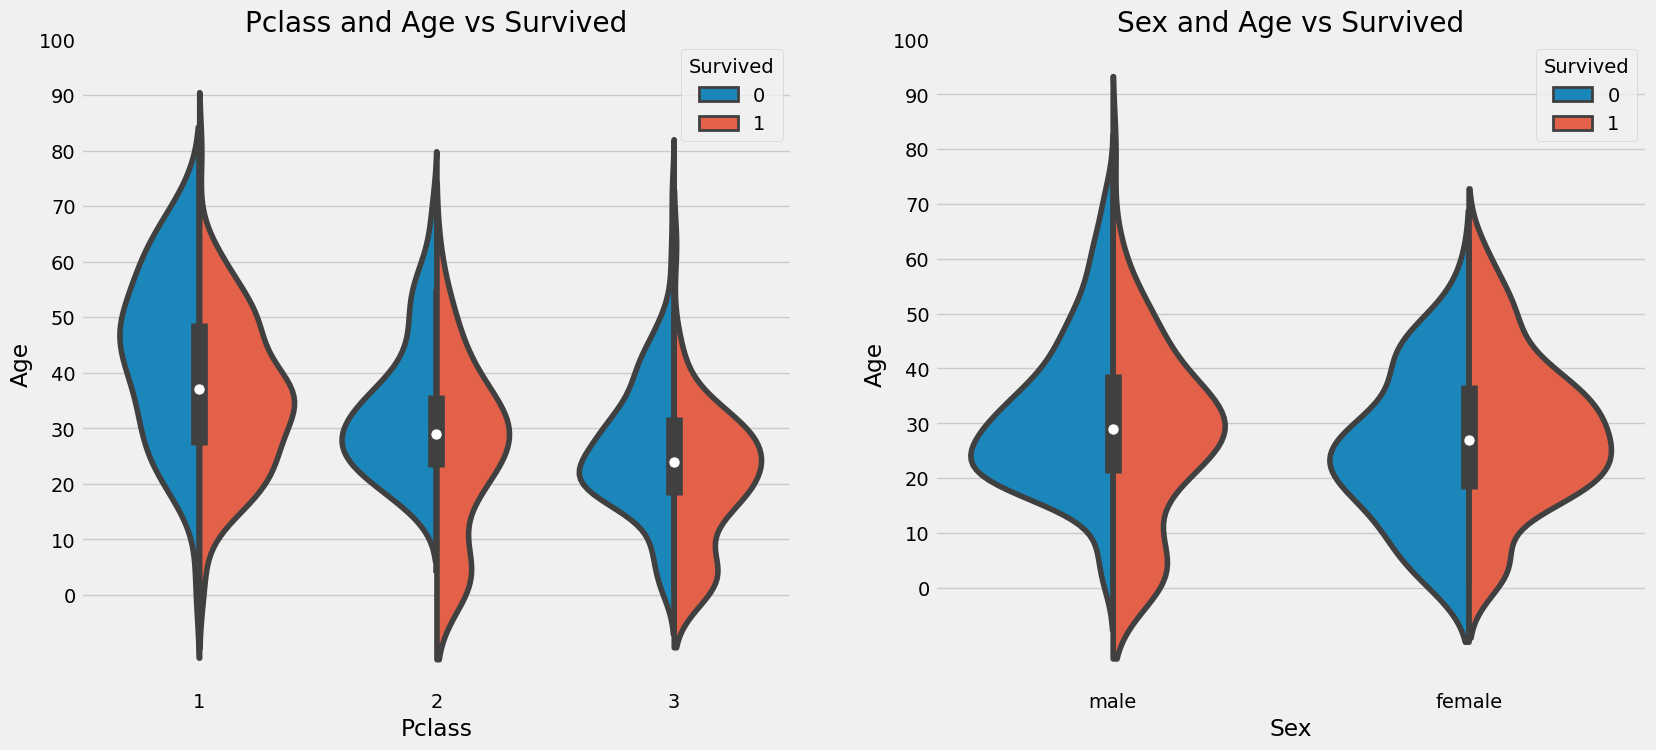

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x ="Pclass",y ="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x ="Sex",y ="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checkin

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [18]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [19]:
data.Age.isnull().any() #So no null values left finally 

False

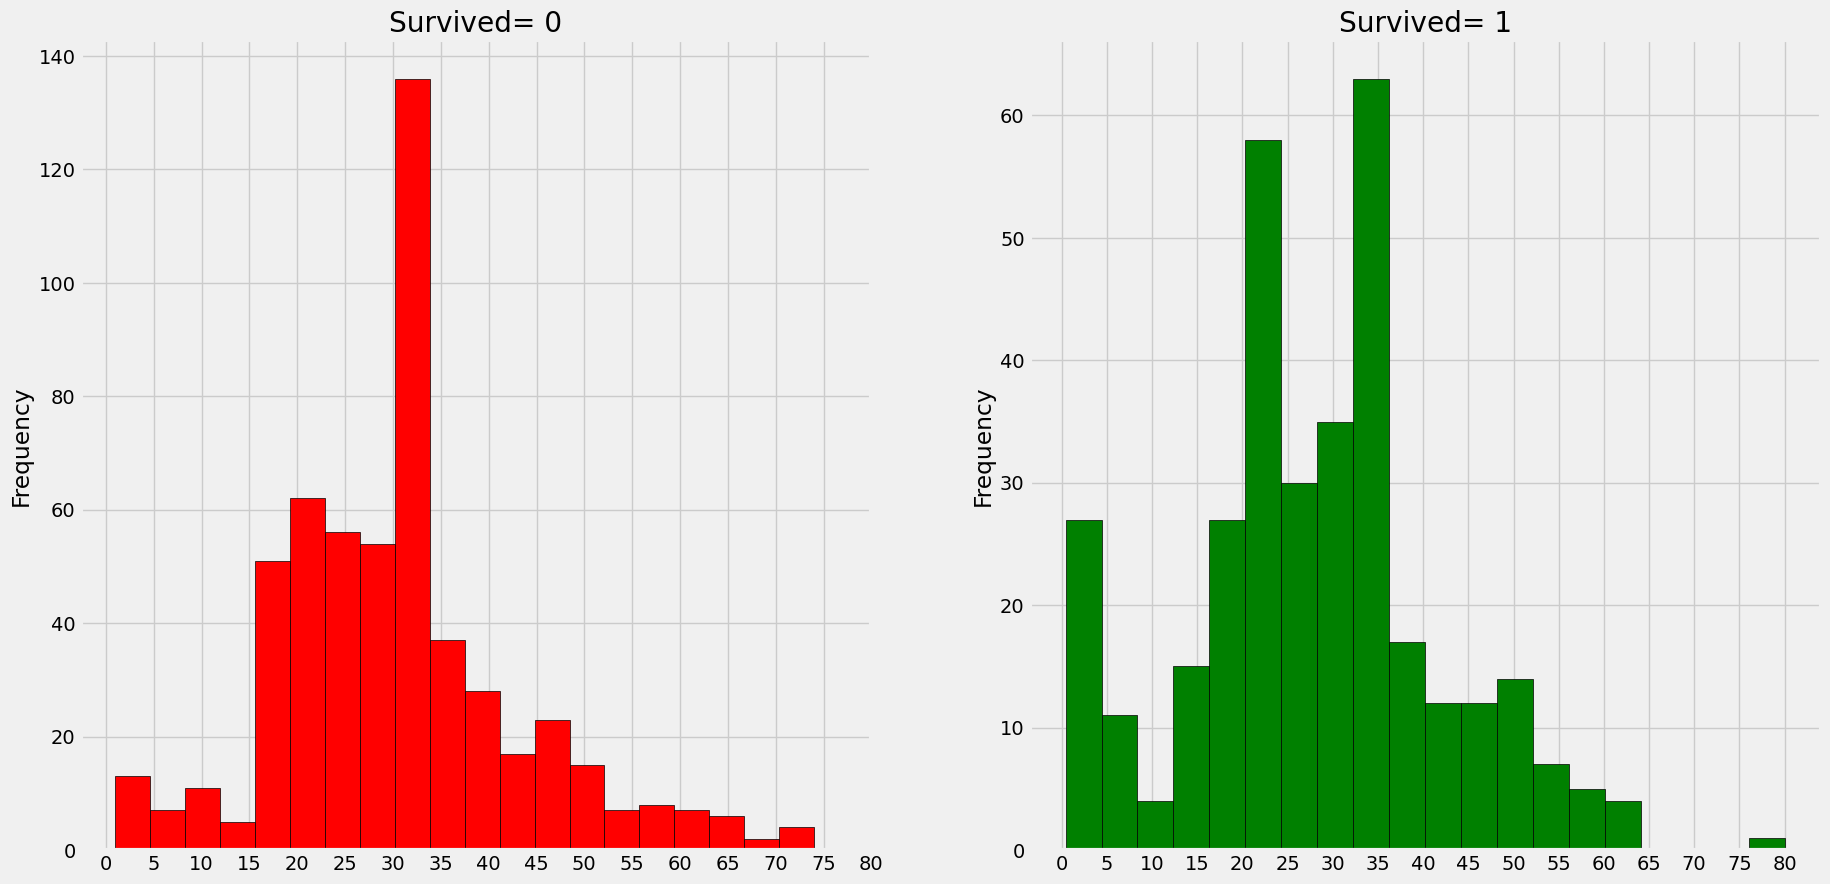

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()


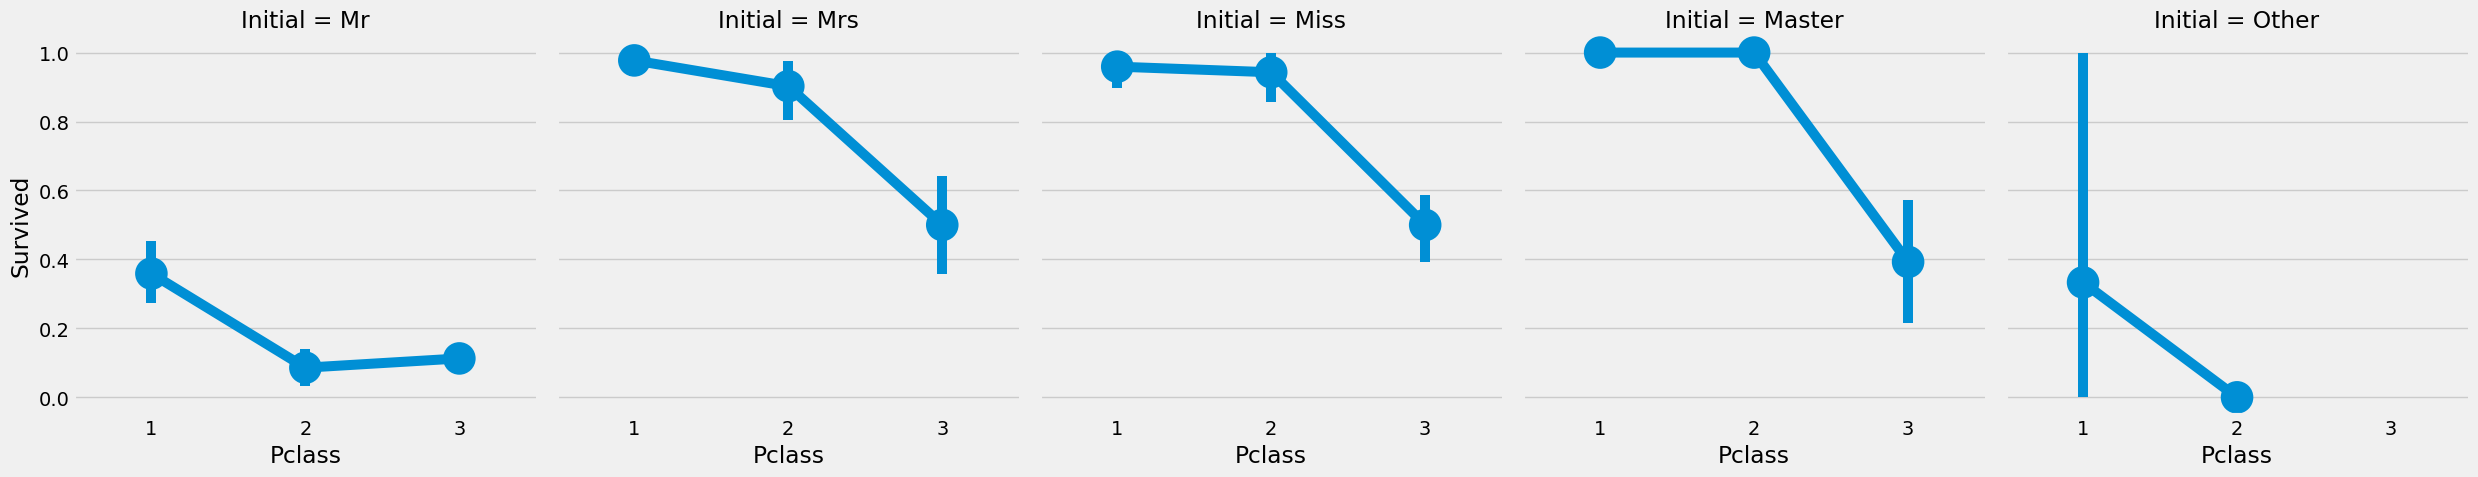

In [21]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

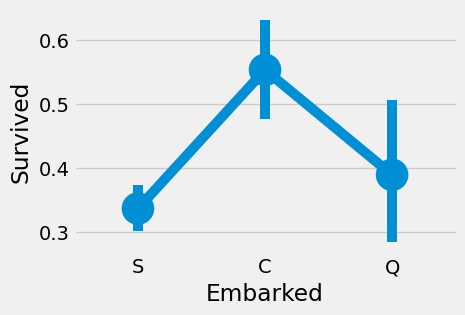

In [23]:
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
plt.gcf().set_size_inches(5, 3)
plt.show()

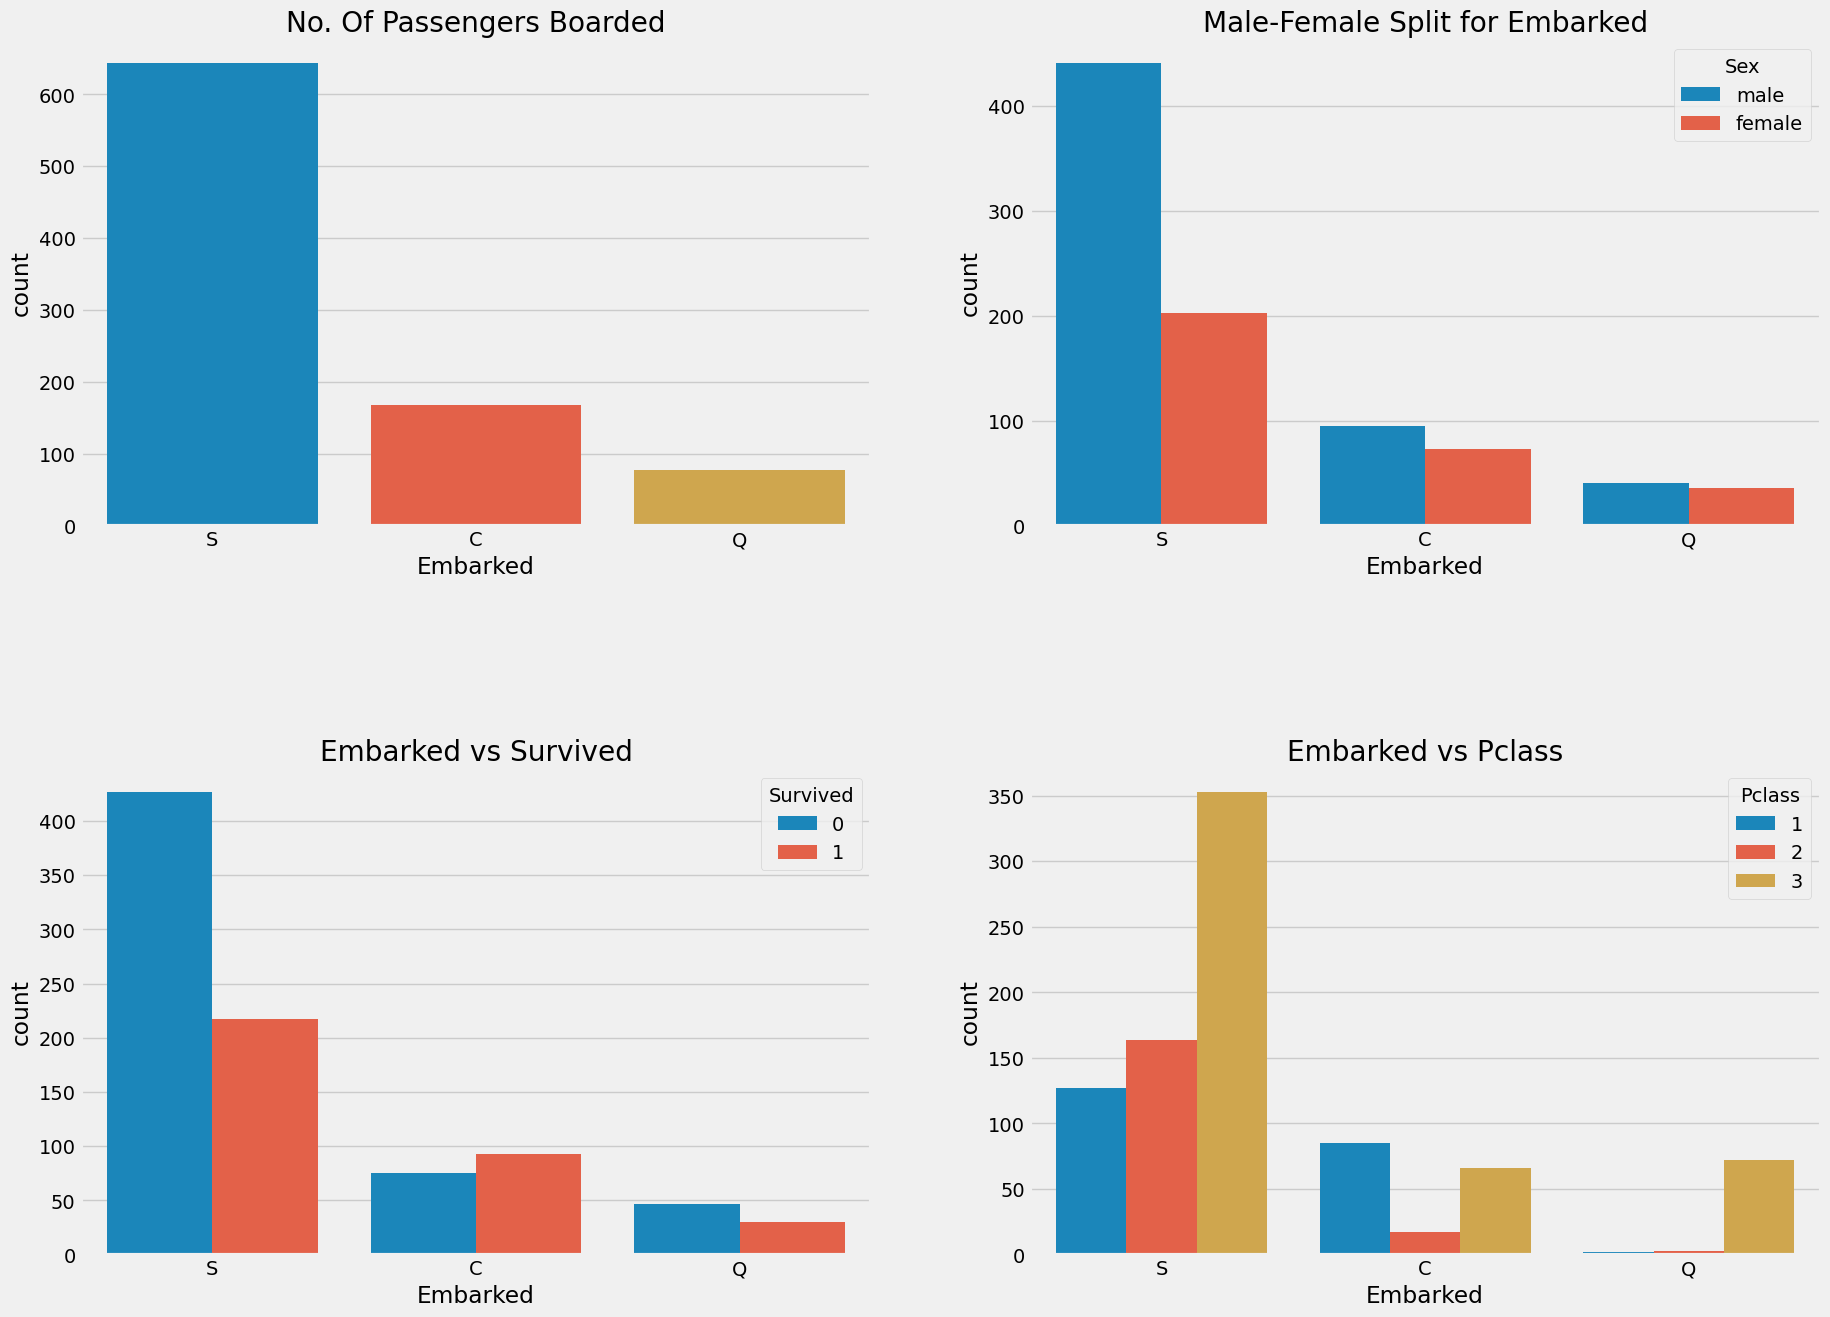

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x = 'Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x ='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x ='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x ='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

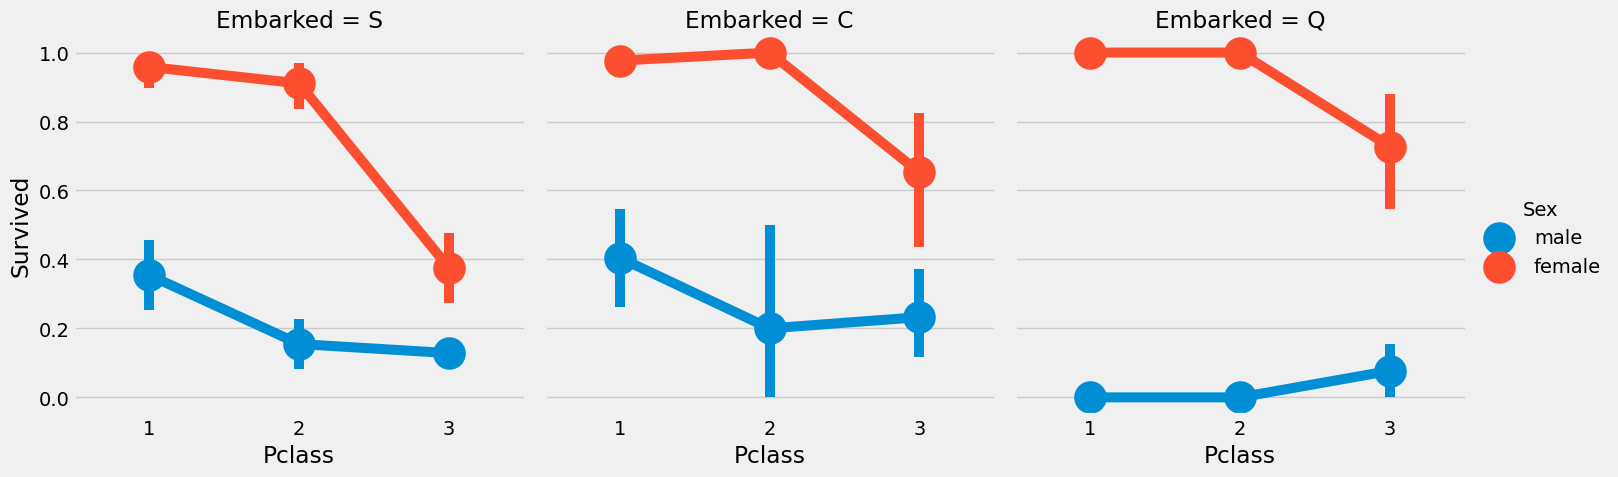

In [25]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.show()

In [26]:
data['Embarked'].fillna('S',inplace=True)

In [27]:
data.Embarked.isnull().any()

False

In [28]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


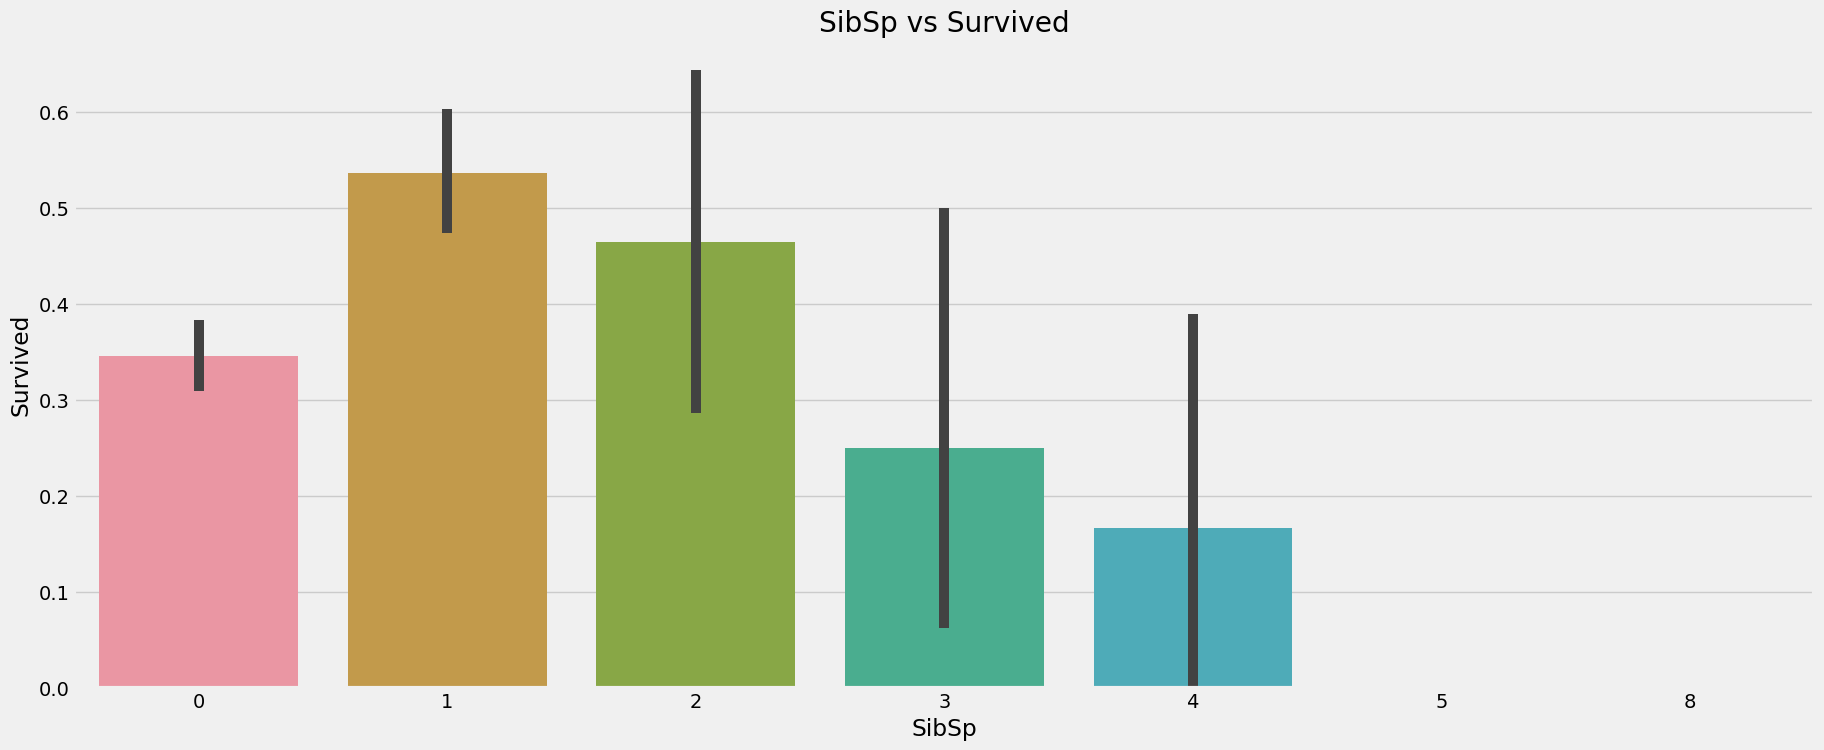

In [29]:
f,ax=plt.subplots(1,1,figsize=(20,8))
sns.barplot(x = 'SibSp',y ='Survived',data=data,ax=ax)
ax.set_title('SibSp vs Survived')

plt.show()

In [30]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [31]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [32]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


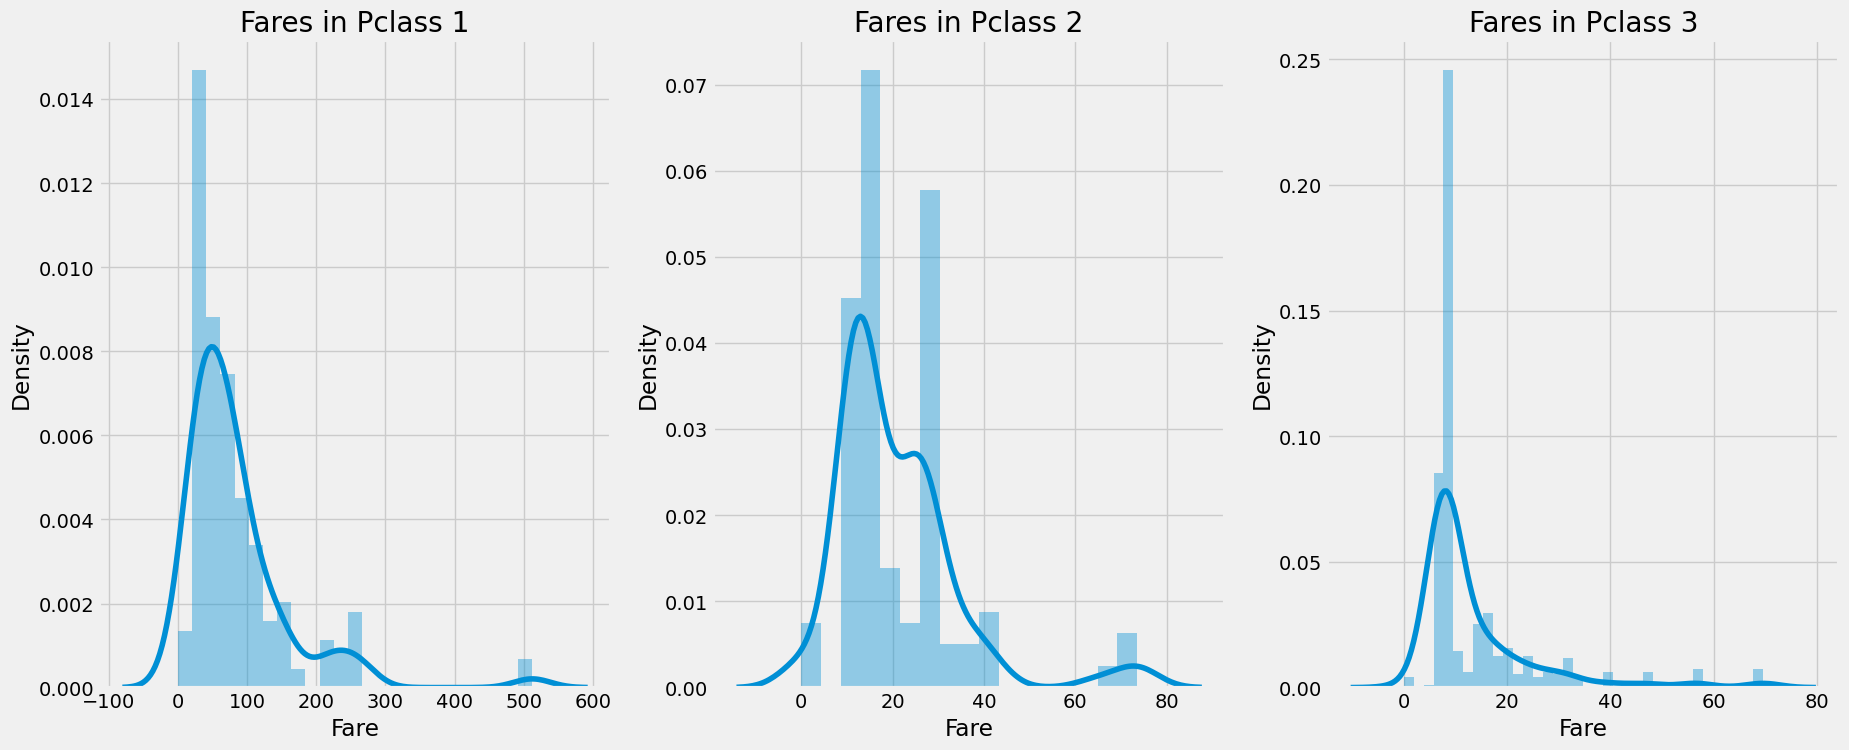

In [33]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

In [34]:
# data = data.drop(["Name","Cabin","Ticket","Fare_Range"], axis=1)


In [35]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [36]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


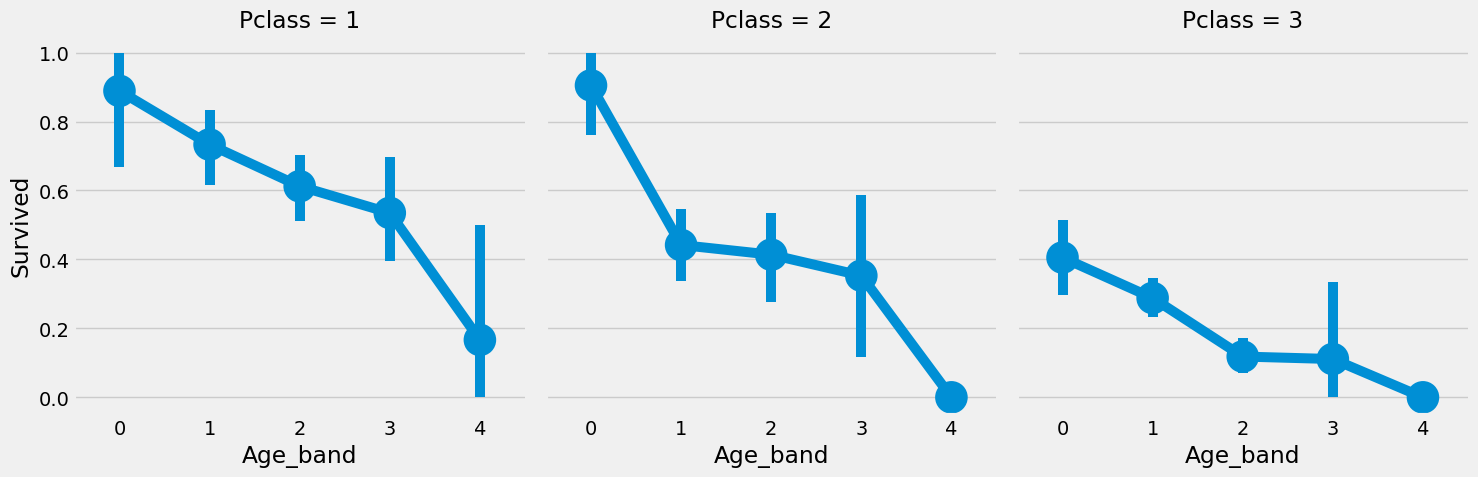

In [37]:
sns.catplot(x='Age_band', y='Survived', data=data, col='Pclass', kind='point')
plt.show()

In [38]:
# Assuming you have already imported necessary libraries, loaded your dataset, and performed data preprocessing.

data['Family_Size'] = data['Parch'] + data['SibSp']  # Calculate family size
data['Alone'] = 0
data.loc[data['Family_Size'] == 0, 'Alone'] = 1  # Set Alone to 1 if Family_Size is 0 (alone)

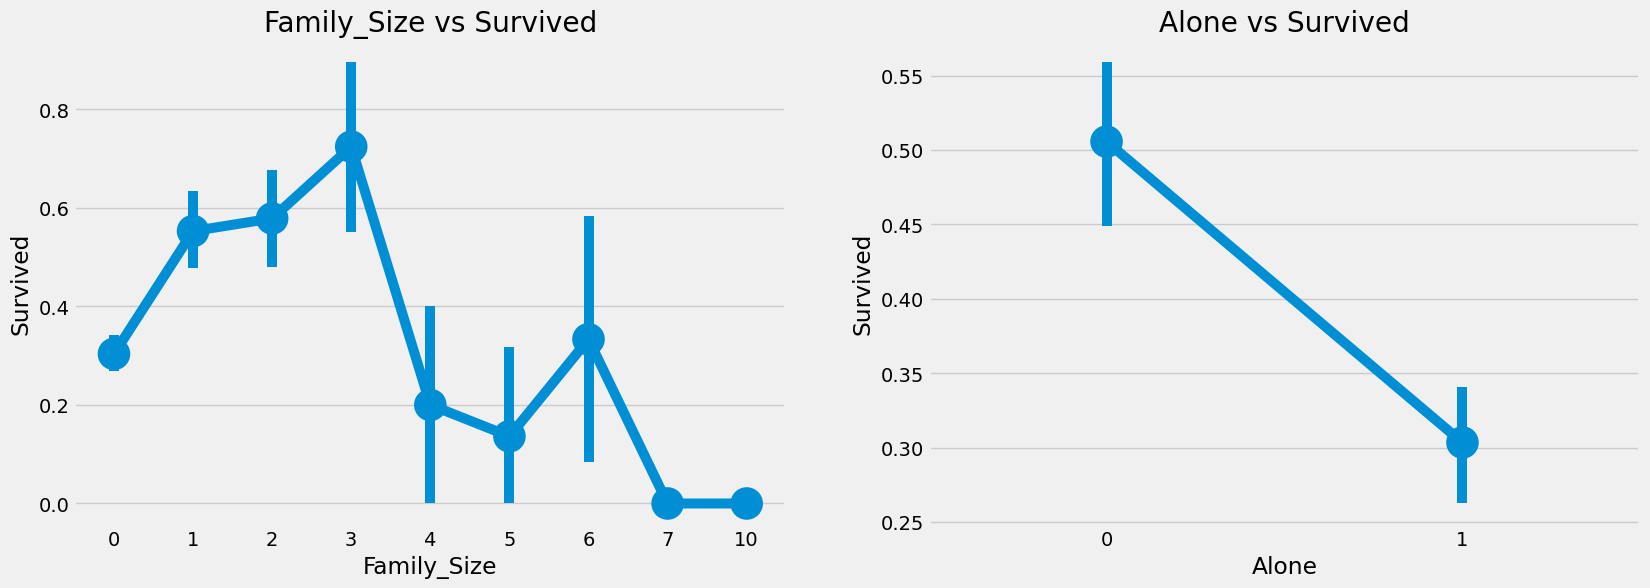

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot for Family_Size vs Survived
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

# Bar plot for Alone vs Survived
sns.pointplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()


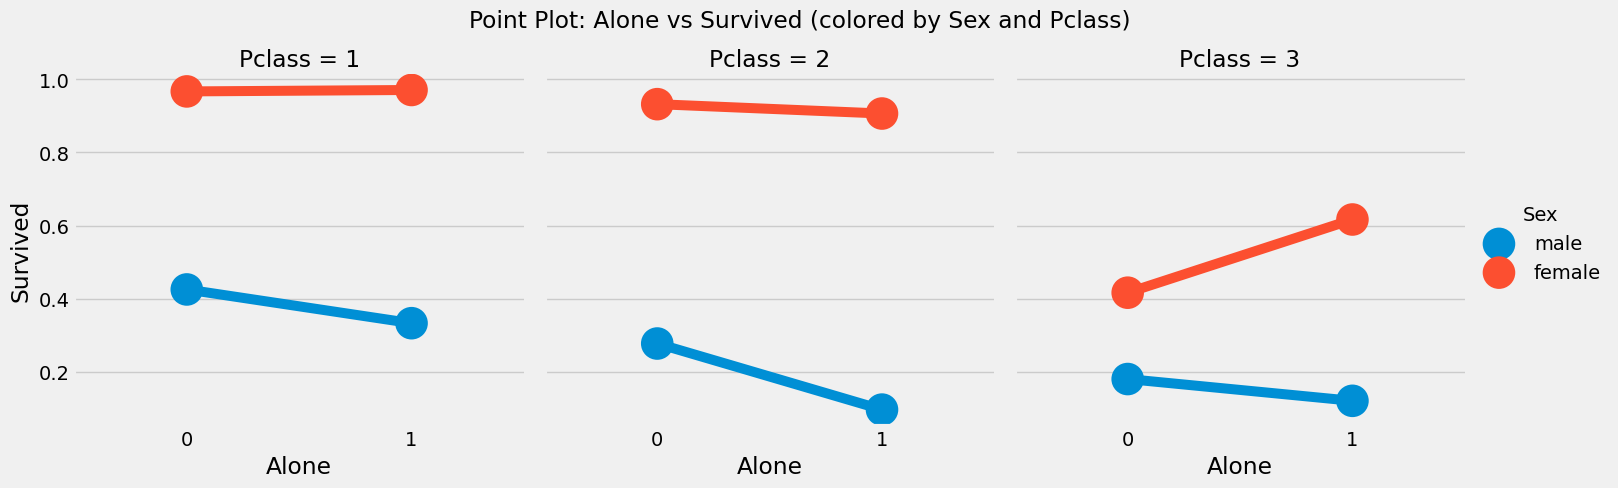

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid to create separate point plots for each level of "Pclass"
g = sns.FacetGrid(data, col="Pclass", hue="Sex", height=5)
g.map(sns.pointplot, "Alone", "Survived", ci=None)
g.add_legend()

# Set plot title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Point Plot: Alone vs Survived (colored by Sex and Pclass)')
plt.show()



In [41]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [42]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

In [43]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [44]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix


In [45]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


In [46]:
data = data.drop(["Name","Cabin","Ticket","Fare_Range", "PassengerId", "Fare"], axis=1)


In [47]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'Initial', 'Age_band', 'Family_Size', 'Alone', 'Fare_cat'],
      dtype='object')

In [49]:
from sklearn.model_selection import train_test_split

# Define the features (X) and labels (Y)
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Initial', 'Age_band', 'Family_Size', 'Alone', 'Fare_cat']]
Y = data['Survived']

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=data['Survived'])


In [50]:
train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
231,3,0,29.0,0,0,0,0,1,0,1,0
836,3,0,21.0,0,0,0,0,1,0,1,1
639,3,0,33.0,1,0,0,0,2,1,0,2
389,2,1,17.0,0,0,1,2,1,0,1,1
597,3,0,49.0,0,0,0,0,3,0,1,0


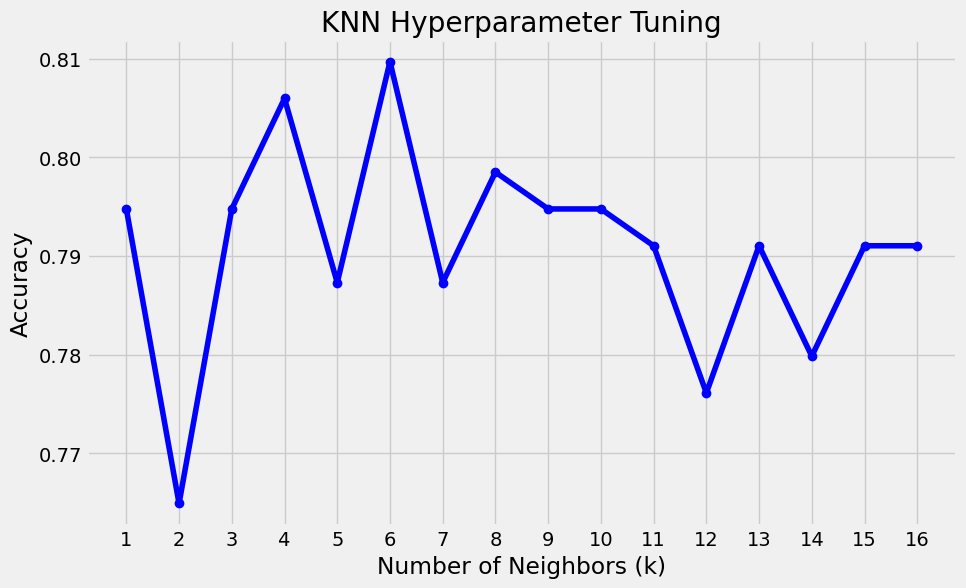

Best K value: 6
Best Accuracy: 80.97%


In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Define a range of k values to test
k_values = range(1, 17)
score_list = []

# Iterate over different values of k
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_X, train_Y)
    score = knn_classifier.score(test_X, test_Y)
    score_list.append(score)

# Find the best k value
best_k = k_values[np.argmax(score_list)]
best_accuracy = max(score_list)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, score_list, marker='o', linestyle='-', color='b')
plt.title("KNN Hyperparameter Tuning")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(np.arange(1, 17, 1))

plt.show()

print("Best K value:", best_k)
print("Best Accuracy: {:.2f}%".format(best_accuracy * 100))
knn_acc = best_accuracy


In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the SVM classifier
svm_classifier = SVC()

# Define a reduced hyperparameter search space
param_dist = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

# Create a randomized search cross-validation object with reduced iterations
n_iter = 10  # Adjust the number of iterations as needed
randomized_search = RandomizedSearchCV(svm_classifier, param_dist, cv=5, n_iter=n_iter)

# Fit the randomized search to the data
randomized_search.fit(train_X, train_Y)

# Get the best hyperparameters from the randomized search
best_params = randomized_search.best_params_

# Get the best estimator (model) from the randomized search
best_svm_classifier = randomized_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_svm_classifier.predict(test_X)

# Evaluate the best model
print("Best Hyperparameters:", best_params)
print(classification_report(test_Y, y_pred))
print(confusion_matrix(test_Y, y_pred))
SVCAcc = accuracy_score(test_Y, y_pred)
print("SVC accuracy: {:.2f}%".format(SVCAcc * 100))


Best Hyperparameters: {'kernel': 'poly', 'gamma': 0.1, 'C': 0.1}
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       165
           1       0.84      0.67      0.75       103

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268

[[152  13]
 [ 34  69]]
SVC accuracy: 82.46%


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define a reduced hyperparameter search space
param_dist = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Create a randomized search cross-validation object with reduced iterations
n_iter = 10  # Adjust the number of iterations as needed
randomized_search = RandomizedSearchCV(dt_classifier, param_dist, cv=5, n_iter=n_iter)

# Fit the randomized search to the data
randomized_search.fit(train_X, train_Y)

# Get the best hyperparameters from the randomized search
best_params = randomized_search.best_params_

# Get the best estimator (model) from the randomized search
best_dt_classifier = randomized_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_dt_classifier.predict(test_X)

# Evaluate the best model
print("Best Hyperparameters:", best_params)
print(classification_report(test_Y, y_pred))
print(confusion_matrix(test_Y, y_pred))
DTC_Acc = accuracy_score(test_Y, y_pred)
print("Decision Tree Classifier accuracy: {:.2f}%".format(DTC_Acc * 100))
dt = DTC_Acc


Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       165
           1       0.82      0.73      0.77       103

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.84      0.84      0.83       268

[[149  16]
 [ 28  75]]
Decision Tree Classifier accuracy: 83.58%


In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the hyperparameter grid to search
paramsGB = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5],
    'subsample': [0.5, 1],
    'max_leaf_nodes': [2, 5, 10, 20, 30, 40, 50]
}

# Create a RandomizedSearchCV object with reduced iterations
n_iter = 10  # Adjust the number of iterations as needed
GB = RandomizedSearchCV(
    GradientBoostingClassifier(),
    paramsGB,
    cv=5,  # Number of cross-validation folds
    n_iter=n_iter,  # Number of parameter settings sampled
    random_state=42  # Random seed for reproducibility
)

# Fit the randomized search to the data
GB.fit(train_X, train_Y)

# Get the best hyperparameters from the randomized search
best_params = GB.best_params_

# Get the best estimator (model) from the randomized search
best_GB_classifier = GB.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_GB_classifier.predict(test_X)

# Evaluate the best model
print("Best Hyperparameters:", best_params)
print(classification_report(test_Y, y_pred))
print(confusion_matrix(test_Y, y_pred))
GBAcc = accuracy_score(test_Y, y_pred)
print("Gradient Boosting Classifier accuracy: {:.2f}%".format(GBAcc * 100))


Best Hyperparameters: {'subsample': 1, 'n_estimators': 300, 'max_leaf_nodes': 5, 'max_depth': 3}
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       165
           1       0.85      0.70      0.77       103

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.83       268

[[152  13]
 [ 31  72]]
Gradient Boosting Classifier accuracy: 83.58%


In [57]:
compare = pd.DataFrame({'Model': ['K Neighbors',   'SVM',  
                                   'Decision Tree', 
                                  'Gradient Boost'], 
                        'Accuracy': [ knn_acc*100,SVCAcc*100,
                                     dt*100, 
                                      GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Decision Tree,83.582090
3,Gradient Boost,83.582090
1,SVM,82.462687
0,K Neighbors,80.970149


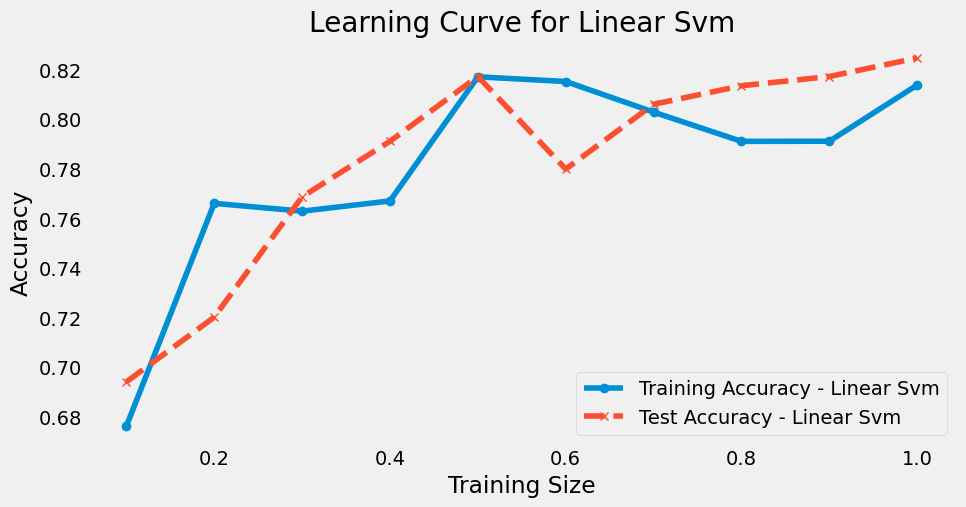

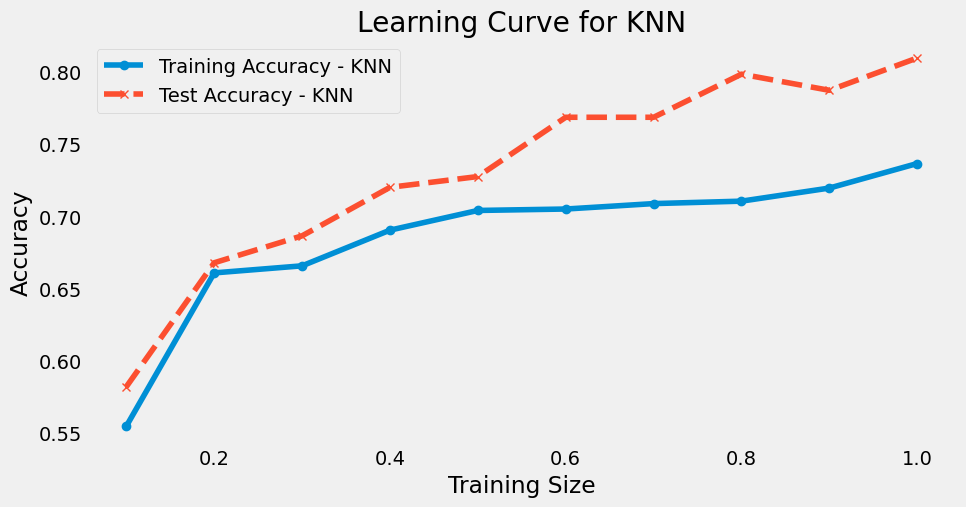

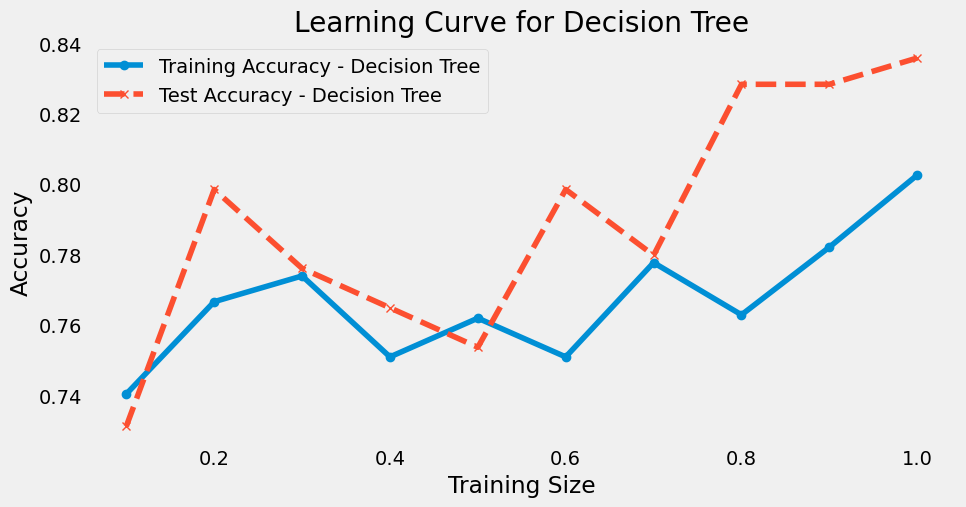

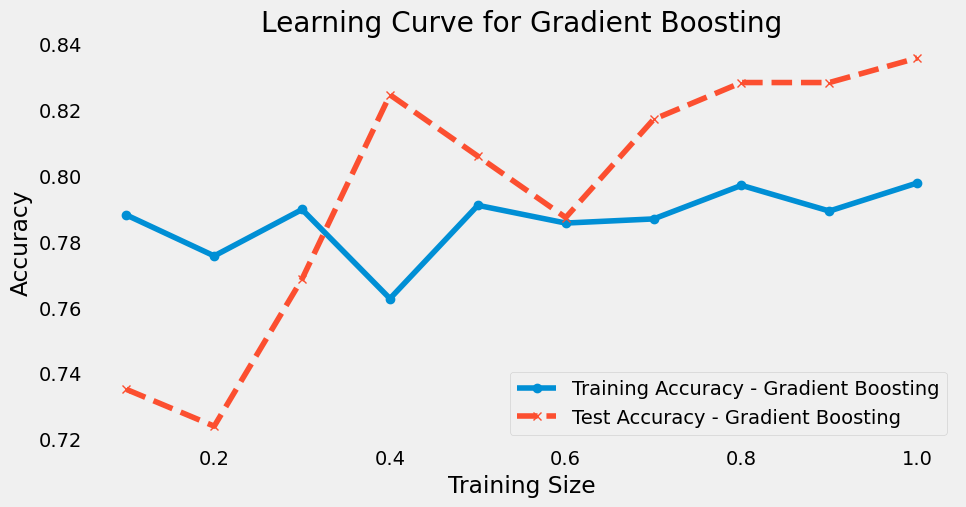

          Classifier  Train Accuracy  Test Accuracy
0         Linear Svm        0.813748       0.824627
1                KNN        0.736636       0.809701
2      Decision Tree        0.802611       0.835821
3  Gradient Boosting        0.797824       0.835821


In [58]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize KFold and other variables
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
train_sizes = np.linspace(0.1, 1.0, 10)  # Vary the training size from 10% to 100%

# Define classifiers with their best hyperparameters
classifiers = [
    ('Linear Svm', SVC(kernel='poly', gamma=0.1, C=0.1)),
    ('KNN', KNeighborsClassifier(n_neighbors=6)),  # Best k value
    ('Decision Tree', DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=2, max_depth=20)),  # Best Decision Tree hyperparameters
    ('Gradient Boosting', GradientBoostingClassifier(subsample=1, n_estimators=300, max_leaf_nodes=5, max_depth=3))  # Best Gradient Boosting hyperparameters
]

# Lists to store final training and testing accuracies
final_train_accuracies = []
final_test_accuracies = []

for name, model in classifiers:
    train_accuracy = []  # Store training accuracy for the current model
    test_accuracy = []   # Store test accuracy for the current model
    
    for train_size in train_sizes:
        X_train_partial = train_X[:int(len(train_X) * train_size)]
        y_train_partial = train_Y[:int(len(train_Y) * train_size)]
        
        cv_result = cross_val_score(model, X_train_partial, y_train_partial, cv=kfold, scoring="accuracy")
        cv_result = cv_result
        
        # Calculate training accuracy
        train_accuracy.append(cv_result.mean())
        
        # Fit the model to the entire training set and calculate test accuracy
        model.fit(X_train_partial, y_train_partial)
        y_pred = model.predict(test_X)
        test_acc = accuracy_score(test_Y, y_pred)
        test_accuracy.append(test_acc)
    
    # Create a new plot for the current classifier
    plt.figure(figsize=(10, 5))
    plt.plot(train_sizes, train_accuracy, marker='o', label=f'Training Accuracy - {name}')
    plt.plot(train_sizes, test_accuracy, marker='x', linestyle='--', label=f'Test Accuracy - {name}')
    plt.title(f'Learning Curve for {name}')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

    # Calculate the final training and testing accuracies for the current classifier
    final_train_acc = train_accuracy[-1]
    final_test_acc = test_accuracy[-1]
    
    final_train_accuracies.append(final_train_acc)
    final_test_accuracies.append(final_test_acc)

# Create a DataFrame to display final training and testing accuracies
accuracy_df = pd.DataFrame({'Classifier': [name for name, _ in classifiers], 'Train Accuracy': final_train_accuracies, 'Test Accuracy': final_test_accuracies})

# Display the accuracy DataFrame
print(accuracy_df)


In [60]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

# Define a custom binary classification model using Keras
def create_binary_classification_model(hidden_layers=1, learning_rate=0.01):
    model = keras.Sequential([
        layers.Input(shape=(11,)),  # Adjust input shape to match the number of features
    ])
    
    for _ in range(hidden_layers):
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.BatchNormalization())
    
    model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification
    
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create a KerasClassifier for use in GridSearchCV
keras_classifier = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_binary_classification_model, verbose=0)

# Define hyperparameters and their respective values to search
param_grid = {
    'hidden_layers': [1, 2, 3],  # Number of hidden layers
    'learning_rate': [0.001, 0.01, 0.1]  # Learning rate
}

# Define a custom scoring metric (F1-score) for binary classification
scoring = make_scorer(f1_score, greater_is_better=True)

# Create a grid search cross-validation object
grid_search = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, scoring=scoring, cv=5)

# Fit the grid search to the training data
grid_search.fit(train_X, train_Y)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_hidden_layers = best_params['hidden_layers']
best_learning_rate = best_params['learning_rate']

# Create the final model with the best hyperparameters
final_model = create_binary_classification_model(hidden_layers=best_hidden_layers, learning_rate=best_learning_rate)

# Train the final model on the entire training data
final_model.fit(train_X, train_Y, epochs=100, batch_size=64, verbose=1)

# Evaluate the final model on the test data
test_loss, test_accuracy = final_model.evaluate(test_X, test_Y, verbose=0)

# Print the results
print("Best Hyperparameters:", best_params)
print("Final Testing Accuracy:", test_accuracy)


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 11ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 11ms/step


4/4 [==============================] - 0s 9ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 12ms/step


4/4 [==============================] - 0s 14ms/step


4/4 [==============================] - 0s 25ms/step


4/4 [==============================] - 0s 9ms/step


4/4 [==============================] - 0s 20ms/step


4/4 [==============================] - 0s 13ms/step


4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 13ms/step


4/4 [==============================] - 0s 10ms/step


4/4 [==============================] - 2s 18ms/step


4/4 [==============================] - 0s 13ms/step


4/4 [==============================] - 0s 19ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 11ms/step


4/4 [==============================] - 0s 11ms/step


4/4 [==============================] - 0s 12ms/step


Epoch 1/100
10/10 [==============================] - 2s 58ms/step - loss: 0.6679 - accuracy: 0.7287
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.5498 - accuracy: 0.7544
Epoch 3/100
10/10 [==============================] - 0s 14ms/step - loss: 0.5377 - accuracy: 0.7673
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 0.5225 - accuracy: 0.7352
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 0.4896 - accuracy: 0.7817
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4679 - accuracy: 0.7785
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.4530 - accuracy: 0.7817
Epoch 8/100
10/10 [==============================] - 0s 12ms/step - loss: 0.4976 - accuracy: 0.7512
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4494 - accuracy: 0.7961
Epoch 10/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4595 - accuracy: 0.7978

Epoch 1/100
10/10 [==============================] - 2s 92ms/step - loss: 0.7730 - accuracy: 0.6774 - val_loss: 21.4981 - val_accuracy: 0.6157
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 0.5120 - accuracy: 0.7689 - val_loss: 1.7169 - val_accuracy: 0.7761
Epoch 3/100
10/10 [==============================] - 0s 14ms/step - loss: 0.5103 - accuracy: 0.7512 - val_loss: 4.3456 - val_accuracy: 0.6866
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.5267 - accuracy: 0.7657 - val_loss: 0.8540 - val_accuracy: 0.8022
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 0.4877 - accuracy: 0.7576 - val_loss: 0.6968 - val_accuracy: 0.7799
Epoch 6/100
10/10 [==============================] - 0s 14ms/step - loss: 0.4840 - accuracy: 0.7737 - val_loss: 2.5232 - val_accuracy: 0.7052
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.5283 - accuracy: 0.7705 - val_loss: 2.7829 - val_accuracy: 0.6903
Epoch

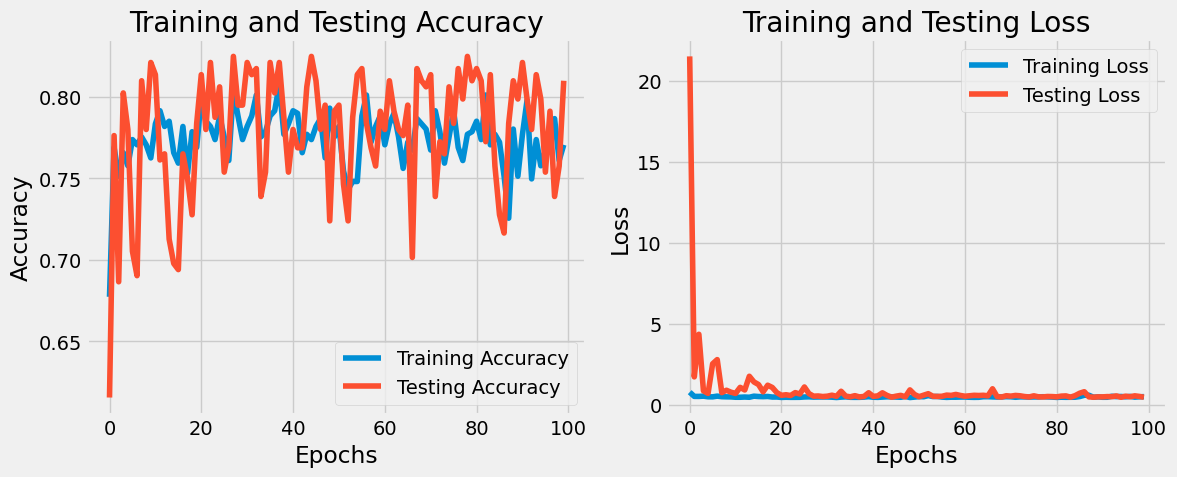

In [61]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Define a custom binary classification model using Keras
def create_binary_classification_model():
    model = keras.Sequential([
        layers.Input(shape=(11,)),  # Adjust input shape to match the number of features (16)
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),  # Two hidden layers
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])
    return model

# Create the binary classification model
model = create_binary_classification_model()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.1),  # Use the best learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_X, train_Y, epochs=100, batch_size=64, validation_data=(test_X, test_Y), verbose=1)

# Plot training and testing accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy')

# Plot training and testing loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss')

plt.tight_layout()
plt.show()
